In [18]:
#Import the packages 
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [19]:
import numpy as np
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.cmap'] = 'Greys'

In [20]:
#Read the mnist data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [21]:
#The data consists of 55000 training images and labels
#The data consists of 10000 testing images and labels
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

(55000, 784)
(55000, 10)


In [22]:
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

(10000, 784)
(10000, 10)


[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


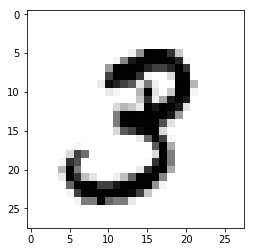

In [24]:
example_image = mnist.train.images[1]
example_image_reshaped = example_image.reshape((28, 28)) # Can't render a line of 784 numbers
example_label = mnist.train.labels[1]

print(example_label)
plt.imshow(example_image_reshaped)

In [7]:
#Create placeholder for input image and respective labels
#The images are greyscale and are 28x28 pixels in size, which is stored as an array of 784 length
#The labels are an array of size 10(No. of classes)
x = tf.placeholder(tf.float32, [None,784])
y_ = tf.placeholder(tf.float32, [None,10])

In [12]:
#Create variables for Weights and biases and apply ReLu Activation function 
W1 = tf.Variable(tf.truncated_normal(shape=[784,100], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[100]))
h1 = tf.nn.relu(tf.matmul(x,W1)+b1)
#Create variables for Weights and biases and apply Softmax function to get the prediction
W2 = tf.Variable(tf.truncated_normal(shape=[100,10],stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[10]))
y = tf.nn.softmax(tf.matmul(h1,W2)+b2)

In [13]:
#Calculate the cross entropy loss
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=[1]))

In [14]:
#Train the model
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [15]:
#Run the session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [16]:
#Training
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [17]:
#Check the accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9617
